In [1]:
import torch #gpu acceleration
device = "cpu"
if (torch.cuda.is_available()):
  device = "cuda"
print("device: " + device)

device: cuda


In [ ]:
import os

print("current working directory: " + os.getcwd())

current working directory: c:\Users\youyo\Downloads\Plant Classification\Plant Classification


In [3]:
image1 = 'C:\\Users\\youyo\\.cache\\kagglehub\\datasets\\abdallahalidev\\plantvillage-dataset\\versions\\3\\plantvillage dataset\\color/Apple___Apple_scab\\88b51f59-08ed-41fe-8402-69f0964f87fe___FREC_Scab 3299.JPG'
image2 = 'C:\\Users\\youyo\\.cache\\kagglehub\\datasets\\abdallahalidev\\plantvillage-dataset\\versions\\3\\plantvillage dataset\\color/Peach___healthy\\af21b56c-130f-4598-849b-a6fb36664c42___Rutg._HL 3637.JPG'

In [4]:
#conver image1 and image2 to tensor
from PIL import Image
from torchvision import transforms


image1 = Image.open(image1).convert("RGB")
image2 = Image.open(image2).convert("RGB")

test_transform = transforms.Compose([
    transforms.Resize((256, 256)), #may change depending on model
    transforms.CenterCrop((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) #gained from commented code
])

image1_converted = test_transform(image1).unsqueeze(0).to(device)
image2_converted = test_transform(image2).unsqueeze(0).to(device)


In [5]:
import torch
import torchvision.models as models
import torch.nn as nn


model =  models.densenet121(pretrained=True)

# for param in model.parameters():
#     param.requires_grad = False

model.classifier = nn.Linear(model.classifier.in_features, 9)

# Load weights to the same device
model.load_state_dict(torch.load('best_model_so_far.pth', map_location=device))
model.to(device)  
model.eval()


C:\Users\youyo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\youyo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
C:\Users\youyo\AppData\Local\Temp\ipykernel_13928\3205661343.py:14: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which us

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

In [6]:
print(dict(model.named_modules()).keys())


dict_keys(['', 'features', 'features.conv0', 'features.norm0', 'features.relu0', 'features.pool0', 'features.denseblock1', 'features.denseblock1.denselayer1', 'features.denseblock1.denselayer1.norm1', 'features.denseblock1.denselayer1.relu1', 'features.denseblock1.denselayer1.conv1', 'features.denseblock1.denselayer1.norm2', 'features.denseblock1.denselayer1.relu2', 'features.denseblock1.denselayer1.conv2', 'features.denseblock1.denselayer2', 'features.denseblock1.denselayer2.norm1', 'features.denseblock1.denselayer2.relu1', 'features.denseblock1.denselayer2.conv1', 'features.denseblock1.denselayer2.norm2', 'features.denseblock1.denselayer2.relu2', 'features.denseblock1.denselayer2.conv2', 'features.denseblock1.denselayer3', 'features.denseblock1.denselayer3.norm1', 'features.denseblock1.denselayer3.relu1', 'features.denseblock1.denselayer3.conv1', 'features.denseblock1.denselayer3.norm2', 'features.denseblock1.denselayer3.relu2', 'features.denseblock1.denselayer3.conv2', 'features.den

In [7]:
from torchcam.methods import SmoothGradCAMpp

cam_extractor = SmoothGradCAMpp(model, target_layer='features.denseblock4.denselayer16.conv2')


In [8]:
# model.eval()
# with torch.no_grad():
#     output1 = model(image1_converted)
#     probs1 = output1.softmax(dim=1)
#     output1 = probs1.argmax(dim=1).item()

# with torch.no_grad():
#     output2 = model(image2_converted)
#     probs2 = output2.softmax(dim=1)
#     output2 = probs2.argmax(dim=1).item()

In [ ]:
with SmoothGradCAMpp(model, target_layer='features.denseblock4.denselayer16.conv2') as cam_extractor:
  # Preprocess your data and feed it to the model
  out = model(image1_converted)
  # Retrieve the CAM by passing the class index and the model output
  activation_map = cam_extractor(out.squeeze(0).argmax().item(), out)

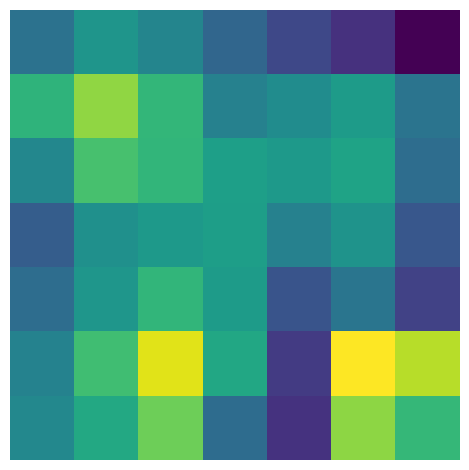

In [10]:
import matplotlib.pyplot as plt
# Visualize the raw CAM
plt.imshow(activation_map[0].squeeze(0).cpu().numpy()); plt.axis('off'); plt.tight_layout(); plt.show()

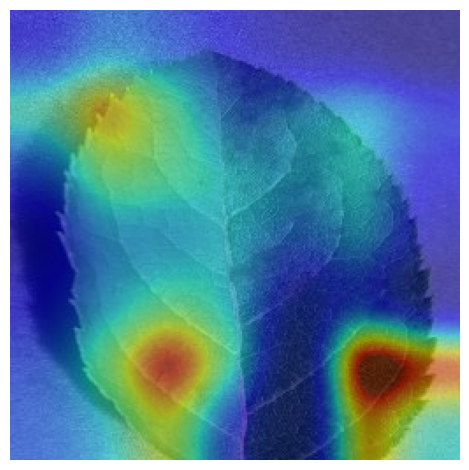

In [11]:
import matplotlib.pyplot as plt
from torchcam.utils import overlay_mask
from torchvision.transforms.functional import normalize, resize, to_pil_image


# Resize the CAM and overlay it
result = overlay_mask(image1, to_pil_image(activation_map[0].squeeze(0).cpu(), mode='F'), alpha=0.5)
# Display it
plt.imshow(result); plt.axis('off'); plt.tight_layout(); plt.show()

In [12]:
print(f'Predicted label for image1: {out.squeeze(0).argmax().item()}')


Predicted label for image1: 0


In [ ]:
with SmoothGradCAMpp(model, target_layer='features.denseblock4.denselayer16.conv2') as cam_extractor:
  # Preprocess your data and feed it to the model
  out = model(image2_converted)
  # Retrieve the CAM by passing the class index and the model output
  activation_map = cam_extractor(out.squeeze(0).argmax().item(), out)

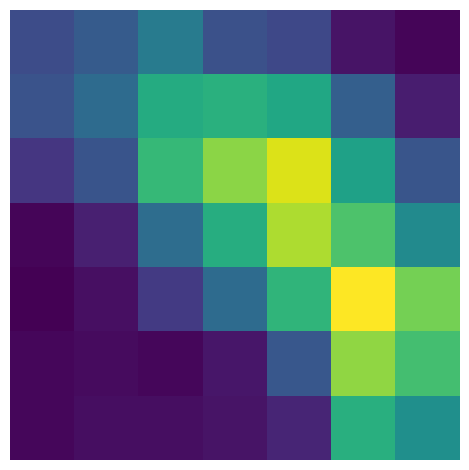

In [14]:
import matplotlib.pyplot as plt
# Visualize the raw CAM
plt.imshow(activation_map[0].squeeze(0).cpu().numpy()); plt.axis('off'); plt.tight_layout(); plt.show()

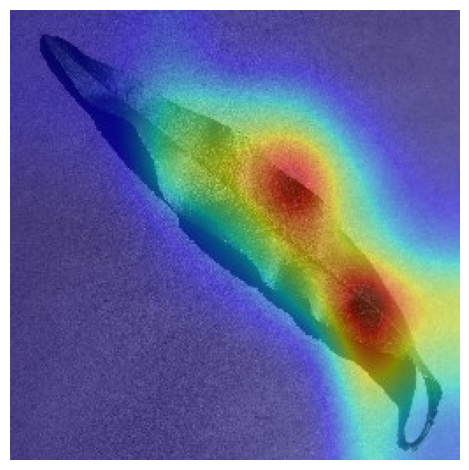

In [15]:
import matplotlib.pyplot as plt
from torchcam.utils import overlay_mask
from torchvision.transforms.functional import normalize, resize, to_pil_image


# Resize the CAM and overlay it
result = overlay_mask(image2, to_pil_image(activation_map[0].squeeze(0).cpu(), mode='F'), alpha=0.5)
# Display it
plt.imshow(result); plt.axis('off'); plt.tight_layout(); plt.show()

In [16]:
print(f'Predicted label for image2: {out.squeeze(0).argmax().item()}')

Predicted label for image2: 4
